In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="ticks", color_codes=True)

# Experience result until 26 Juillet 2016

Resume of our last discussion, the schemas we need are:

1. erreur de reconstruction pour un moyenne de 5 runs, ou n = 2, 4, 10, 20, 50
2. erreur de reconstruction des exemple xt dans un model déjà entrainé
3. moyenne de l'erreur sur le training en fonction de l'époch


## Reconstruction error with different hidden layer units

This schema gives the MSE error of the autoencoder woth different hidden layer units. The network is trained with mini-batch size=50, learningrate is adaptive, max expoch=1500, structure is 56-n-56.The n I tested are 2,4,10,20,30,40,50,56. Result is average of 5 runs. The training time for one structure are 50 mins.

The training set we use are example[1,6000] from person1 session 1. 

So in the x axis is the hidden layer units from 1 - 56, on the y axis is the training and valid MSE error. 

We can see that the MSE basiclly decrese when the hidden layer units increase, which is normal for an autoencoder. Else, we can see at n = 2, the error is high, which means EEG data is more than 2 dimensions, but the error is basically same if n bigger than 20. For when n=56, ideally, the error should be 0 if we initialize the parameters in a matrix like:
$$
\left(\begin{array}{ccc} 
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{array}\right)$$ 


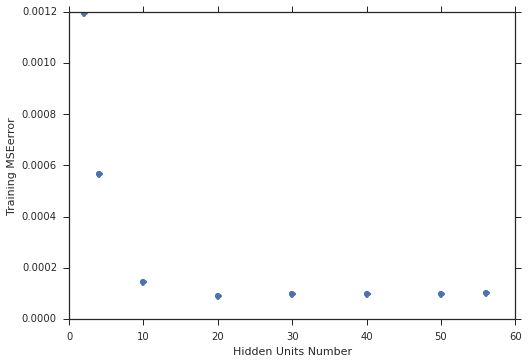

In [8]:
filepath = 'exp_25_07_16_average.csv'
exp_25_07_16_average = pd.read_csv(filepath)
#plt.plot(exp_25_07_16_average.HiddenUnits,exp_25_07_16_average.TrainMSE,'bh')
plt.plot(exp_25_07_16_average.HiddenUnits,exp_25_07_16_average.TrainMSE,'bo')
plt.xlabel('Hidden Units Number')
plt.ylabel('Training MSEerror')
plt.show()

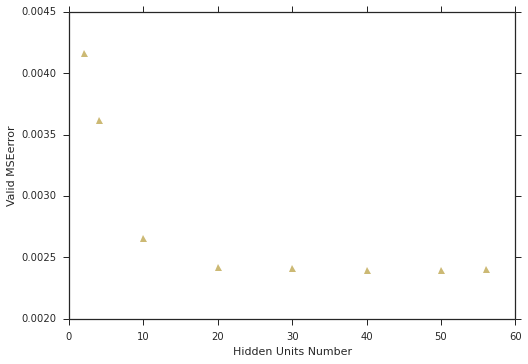

In [7]:
plt.plot(exp_25_07_16_average.HiddenUnits,exp_25_07_16_average.ValidMSE,'y^')
plt.xlabel('Hidden Units Number')
plt.ylabel('Valid MSEerror')
plt.show()

## Tracing the error in each examples for autoencoder

This schema gives the MSE error for each examples through our autoencoder already trained. The network is trained with mini-batch size=50, learningrate is adaptive, max expoch=1500, structure is 56-20-56.

The training set we use are example[1,6000] from person1 session1. Once the training is finished, I have tested all the examples we have([1,12000] from person1 session1). All the data have been normalized into [0,1].

[1:6000]:      training examples from P1S1
[6001:12000]:  valid examples from P1S1
So in the x axis is the 12000 examples, on the y axis is the MSE error. The training time is 17 minutes.

This result is very bizzard for me, the valid error is lower than the training error, which is really unsual. And as other results, there is a certain period (here is [3500,4200]) have a high error,this may be the structure of the EEG data. So, in the next schema, I have inversed the training and valid set to see if this phenomena still exists.


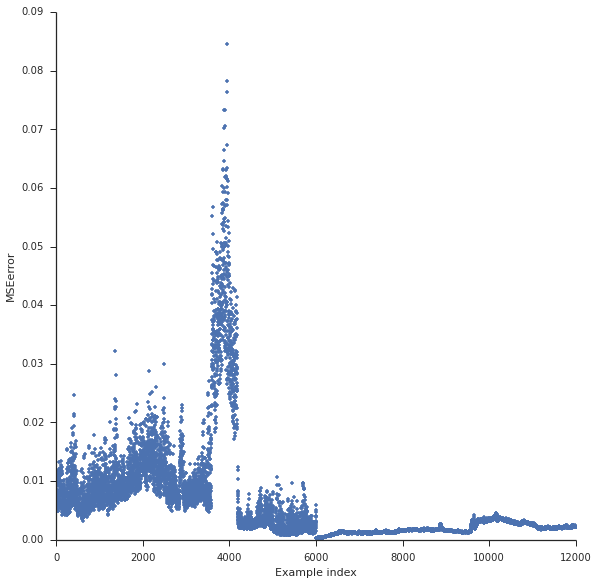

In [44]:
filepath = 'exp_25_07_16_2.csv'
errorexamples = pd.read_csv(filepath)
g = sns.FacetGrid(errorexamples, hue="HiddenUnits", size=8)
#g.map(plt.plot, "HiddenUnits", "TrainMSE")
plt.plot(errorexamples.Index,errorexamples.MSE,'b.')
plt.xlabel('Example index')
plt.ylabel('MSEerror')
plt.show()

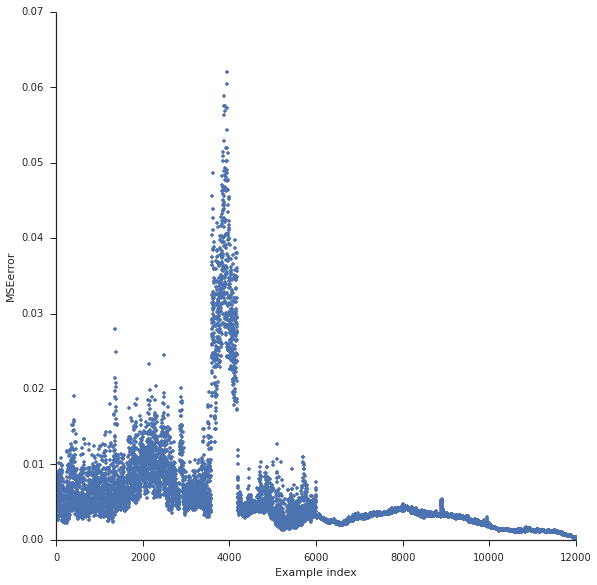

In [43]:
filepath = 'exp_25_07_16_4.csv'
errorexamples = pd.read_csv(filepath)
g = sns.FacetGrid(errorexamples, hue="HiddenUnits", size=8)
#g.map(plt.plot, "HiddenUnits", "TrainMSE")
plt.plot(errorexamples.Index,errorexamples.MSE,'b.')
plt.xlabel('Example index')
plt.ylabel('MSEerror')
plt.show()

After inverse the training and valid set, I have a result similar. A peak in the training set MSE error, and valid set MSE error lower than the training set. So it seems like a bug, i will keep looking the code to find the reason.

## Tracing the MSE error in function of the epoch

This schema gives the MSE error after every training epoch to see the convergence. The network is trained with mini-batch size=50, learningrate have 3 strategies, max expoch=2000, structure is 56-20-56.

The training set we use are example[1,6000] from person1 session1. All the data have been normalized into [0,1].
In the x axis is the training epoch, on the y axis is the MSE error. 

Exp1: Learning rate = 1, the training time is 17 minutes.
Exp2: Adaptive learning rate, training time is 26 minutes.
Exp3: Learning rate = 10, traning time is 27 mins.

This result shows that 50 epoch is not enough to converge for autoencoder, learning rate 1 is too small, it didnt converge after 2000 epochs. Learning rate 10 converged after 1000 epoch, but still have vibration after. Looke like adaptive is the best solution,  converge well after 1000 epochs.

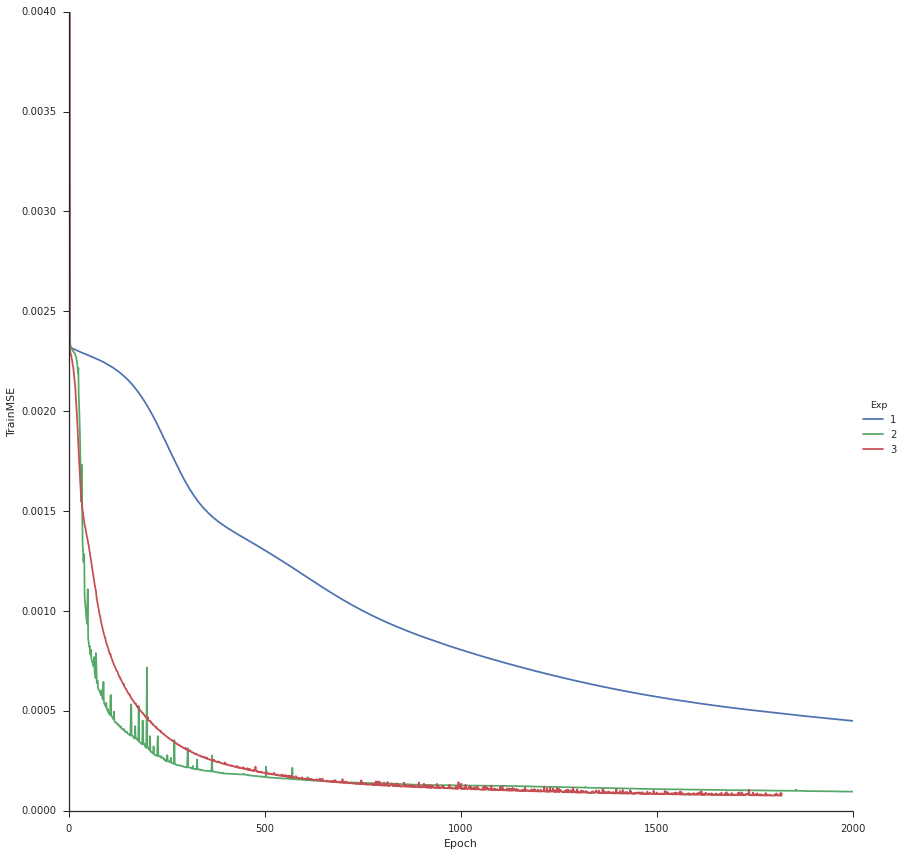

In [40]:
filepath = 'exp_25_07_16_3.csv'
dataset = pd.read_csv(filepath)
g = sns.FacetGrid(dataset, hue="Exp", size=12)
(g.map(plt.plot, "Epoch", "TrainMSE")).set(xlim=(0, 2000), ylim=(0, 0.004))
#g.map(plt.plot, "Epoch", "ValidMSE",color="b")
g.add_legend()
# plt.plot(dataset.Epoch,dataset.TrainMSE,'b.')
# plt.plot(dataset.Epoch,dataset.ValidMSE,'r.')
# plt.xlabel('Epoch number')
# plt.ylabel('Training MSE error')
# plt.show()

# Exps until 22 Juillet 2016

## Schema of reconstruction error with only autoencoder

This schema is to view the influence of the hidden layer units to the MSE error. Max epoch set to 50, learning rate is 1.

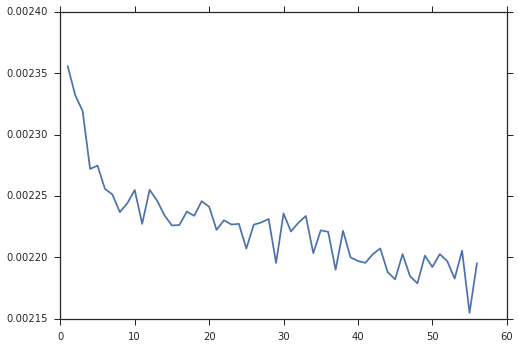

In [18]:
filepath = 'autoencoder.csv'
autoencoder = pd.read_csv(filepath)
#g = sns.FacetGrid(autoencoder, hue="LearningRate", size=12)
#g.map(plt.plot, "HiddenUnits", "TrainMSE")

plt.plot(autoencoder.HiddenUnits,autoencoder.TrainMSE)
#g.add_legend();

## Learning curve

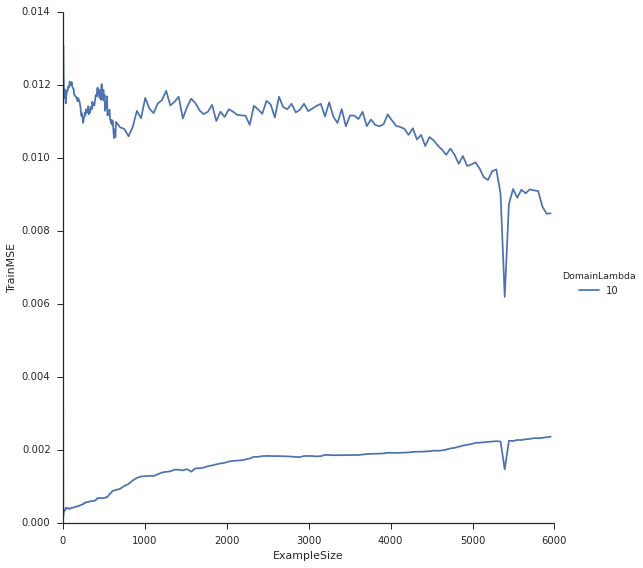

In [19]:
filepath = 'learningcurve.csv'
learningcurve = pd.read_csv(filepath)
g = sns.FacetGrid(learningcurve, hue="DomainLambda", size=8)
#g = sns.FacetGrid(learningcurve, col="Exp", col_wrap = 2, size=13)
g.map(plt.plot, "ExampleSize", "ValidMSE")
g.map(plt.plot, "ExampleSize", "TrainMSE")


g.add_legend();

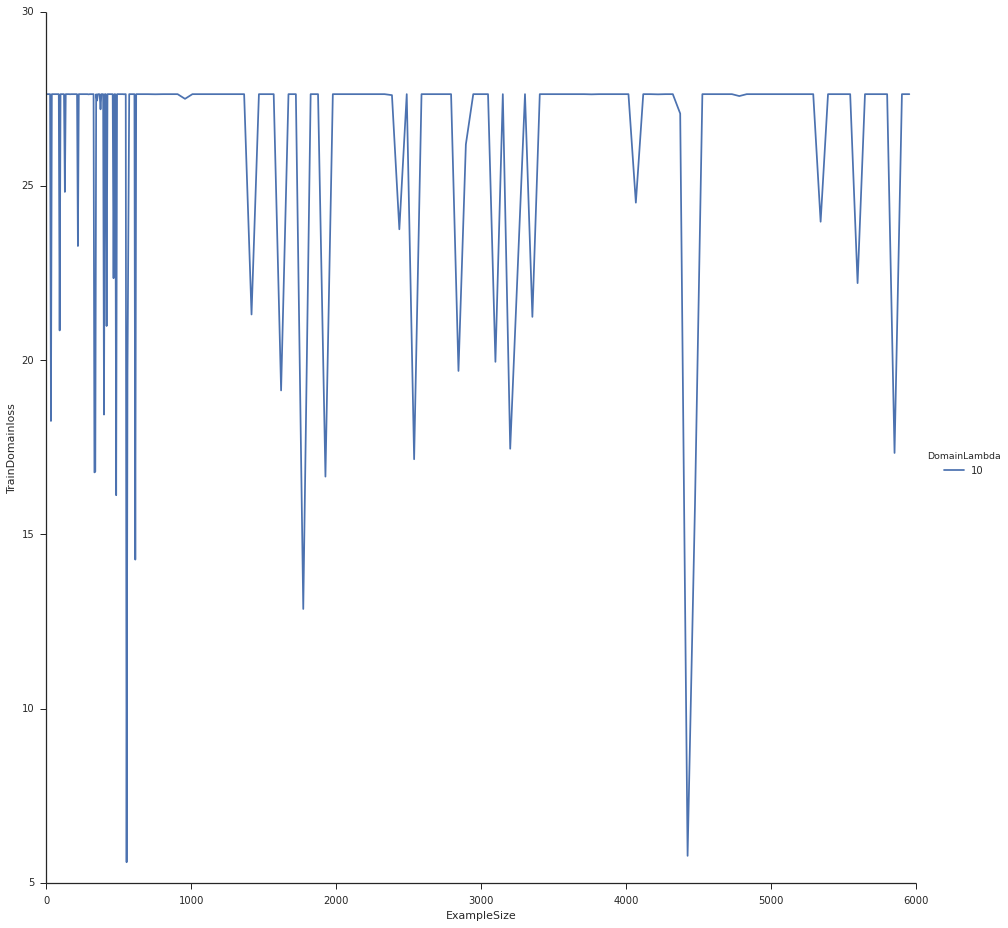

In [18]:
g = sns.FacetGrid(learningcurve, hue="DomainLambda", size=13)
#g = sns.FacetGrid(learningcurve, col="Exp", col_wrap = 2, size=13)
#g.map(plt.plot, "ExampleSize", "ValidDomainloss")
g.map(plt.plot, "ExampleSize", "TrainDomainloss")
g.add_legend();

# Learning rate schedule

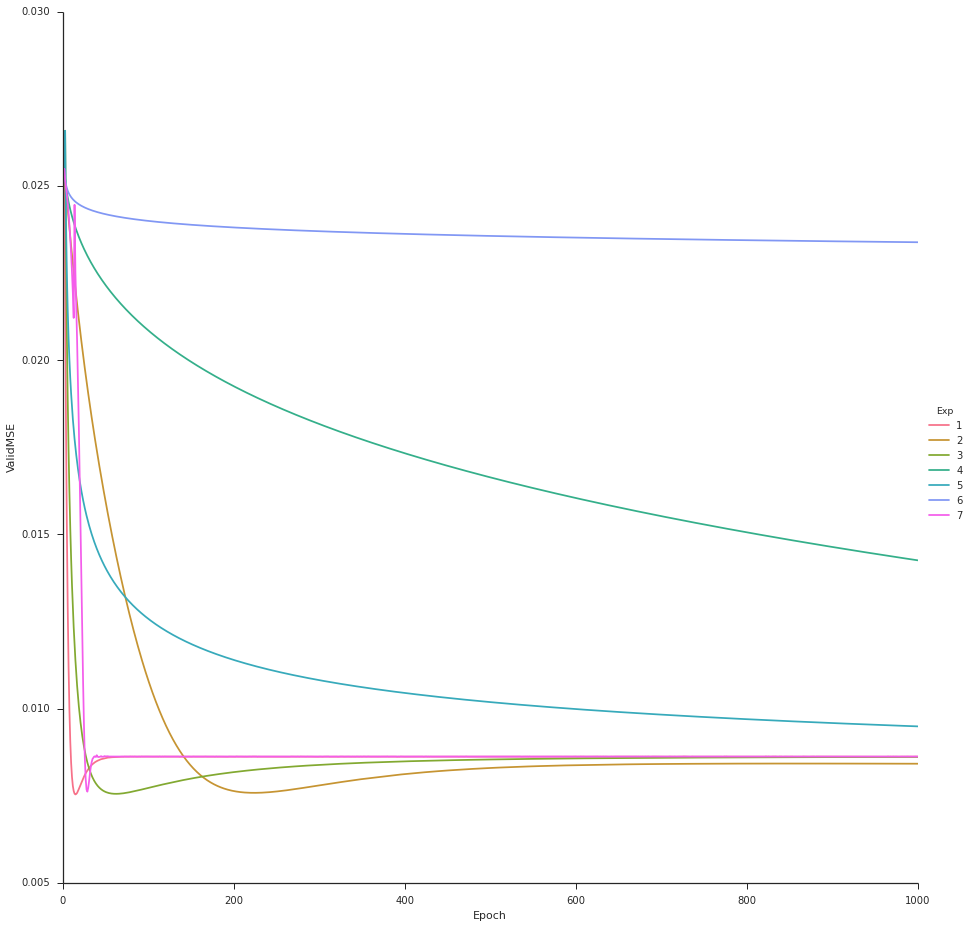

In [12]:
#Exp 1 learning rate
filepath = 'exp1/exp1.csv'
exp1 = pd.read_csv(filepath)
g = sns.FacetGrid(exp1, hue="Exp", size=13)
#g = sns.FacetGrid(exp1, col="Exp", col_wrap = 2, size=13)
g.map(plt.plot, "Epoch", "ValidMSE")
g.add_legend();

# Sigmoid

For this exp, the initialition is random. One hidden layer. Learning rate set to 1, result get when 200 epoch

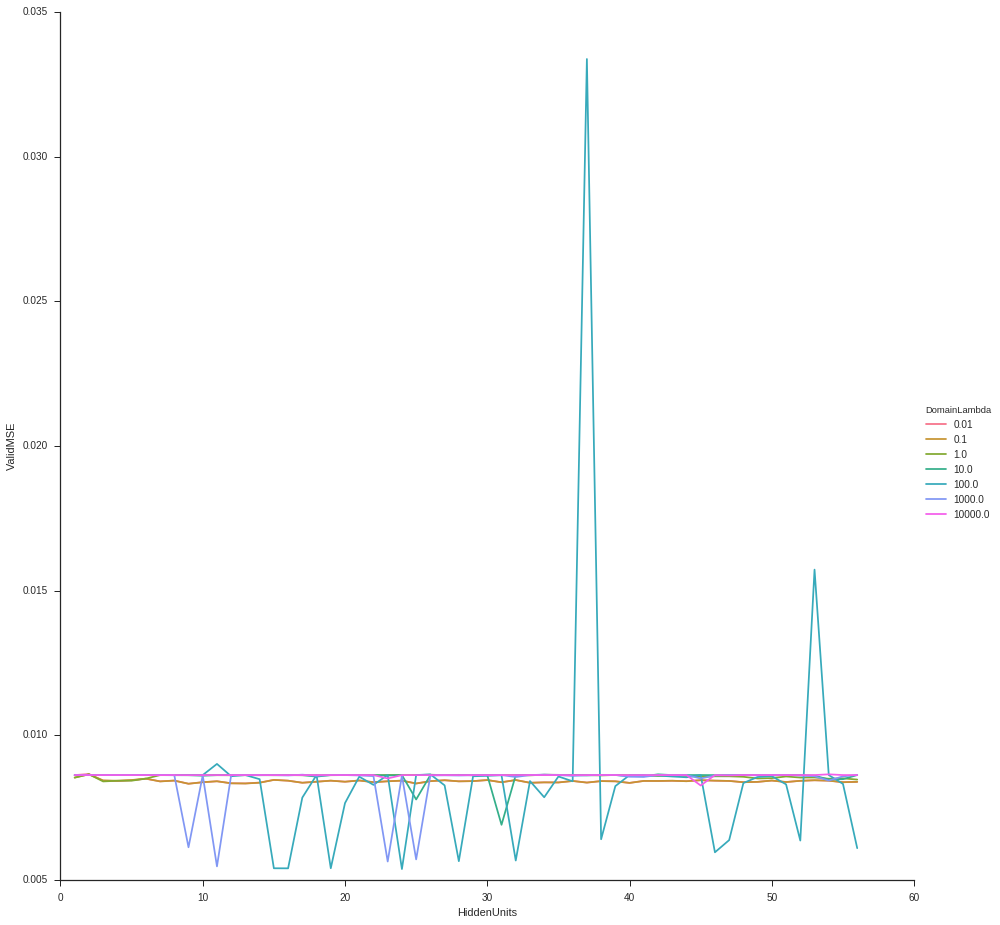

In [3]:
#exp2 0-56
filepath = 'exp2/exp2.csv'
exp2 = pd.read_csv(filepath)
g = sns.FacetGrid(exp2,hue="DomainLambda", size=13)
#g = sns.FacetGrid(exp2,col_wrap=2, col="DomainLambda", size=6)
g.map(plt.plot, "HiddenUnits", "ValidMSE")
g.add_legend();

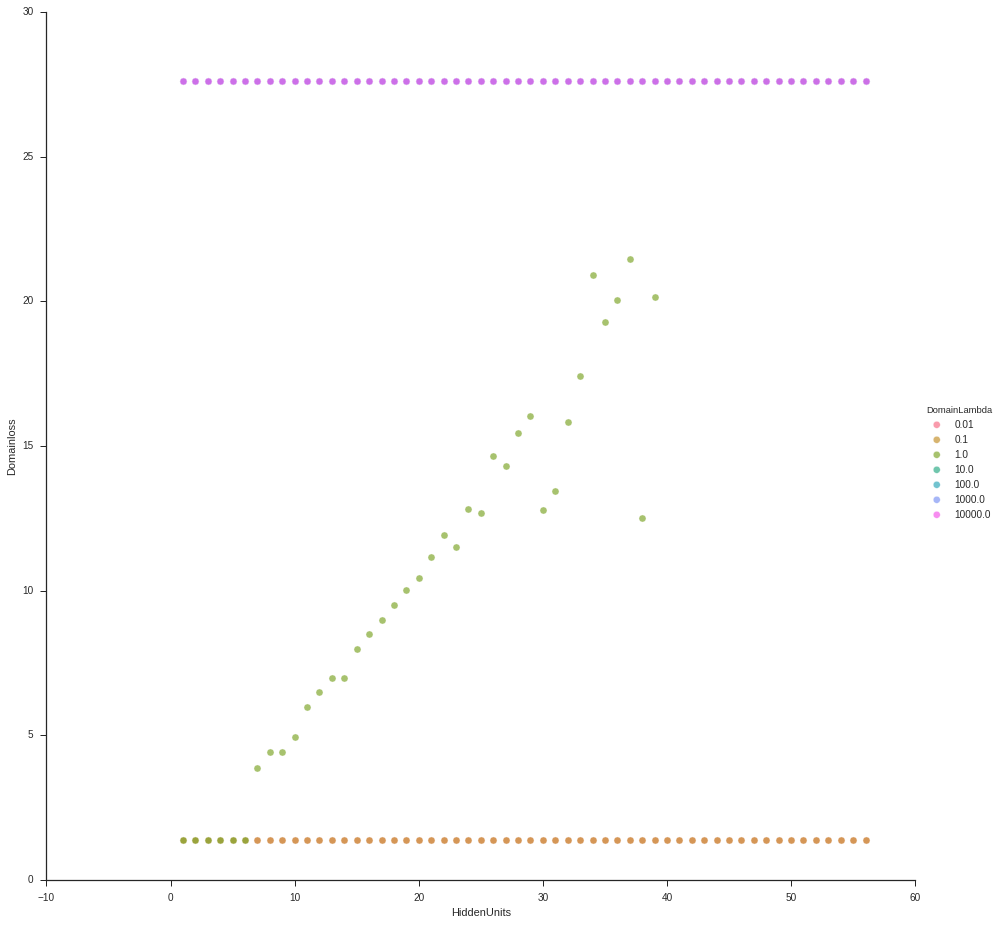

In [4]:
g = sns.FacetGrid(exp2, hue="DomainLambda", size=13)
#g = sns.FacetGrid(exp2, col_wrap = 2,col="DomainLambda", size=7)
#g.map(plt.plot, "HiddenUnits", "Domainloss")
g.map(plt.scatter, "HiddenUnits", "Domainloss", s=50, alpha=0.7, linewidth=.5, edgecolor="white")
g.add_legend();

# Sigmoid after random initialisation correction

For this exp, the initialition is random. One hidden layer. Learning rate set to 1, result get when 100 epoch.

Before, the initialisation isn't really random, this time, for every run, I gave a seed from 1 to 99, to get the initialisation random.

Besides, the value got is the average of 10 runs.

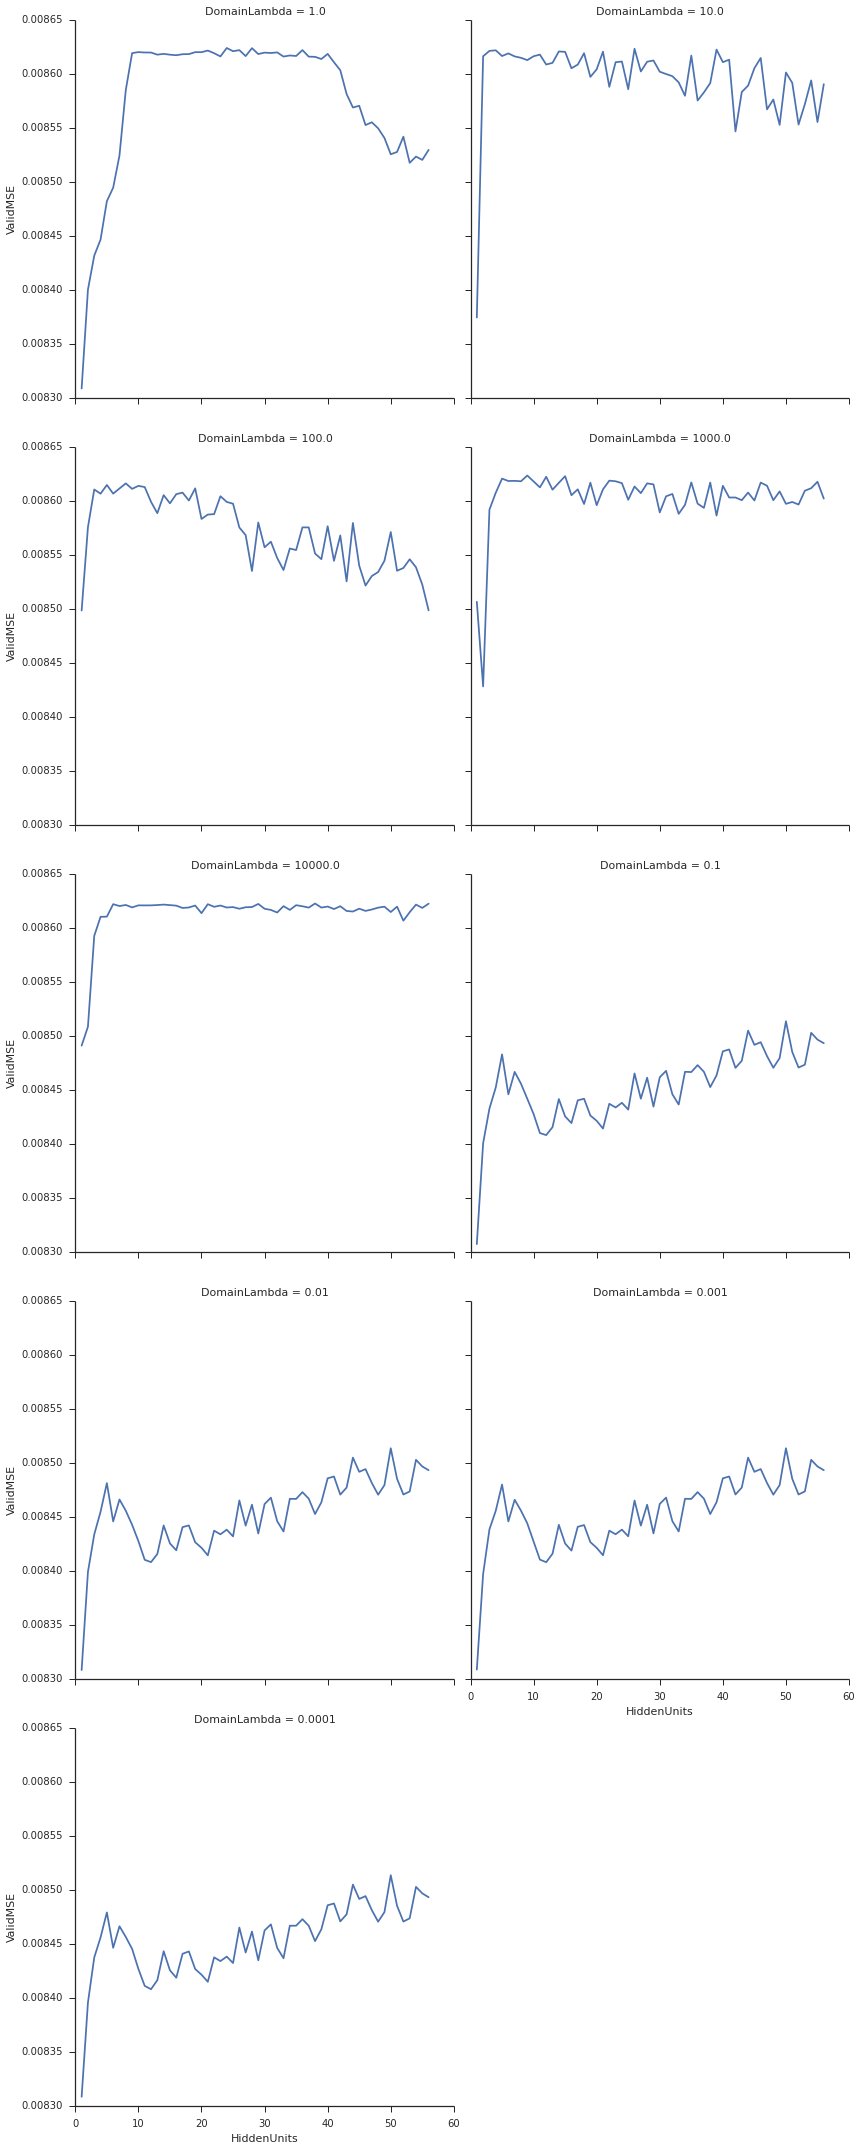

In [7]:
#exp2 0-56
filepath = 'average_value.csv'
average_value = pd.read_csv(filepath)
#g = sns.FacetGrid(average_value,hue="DomainLambda", size=13)
g = sns.FacetGrid(average_value,col_wrap=2, col="DomainLambda", size=6)
g.map(plt.plot, "HiddenUnits", "ValidMSE")
g.add_legend();

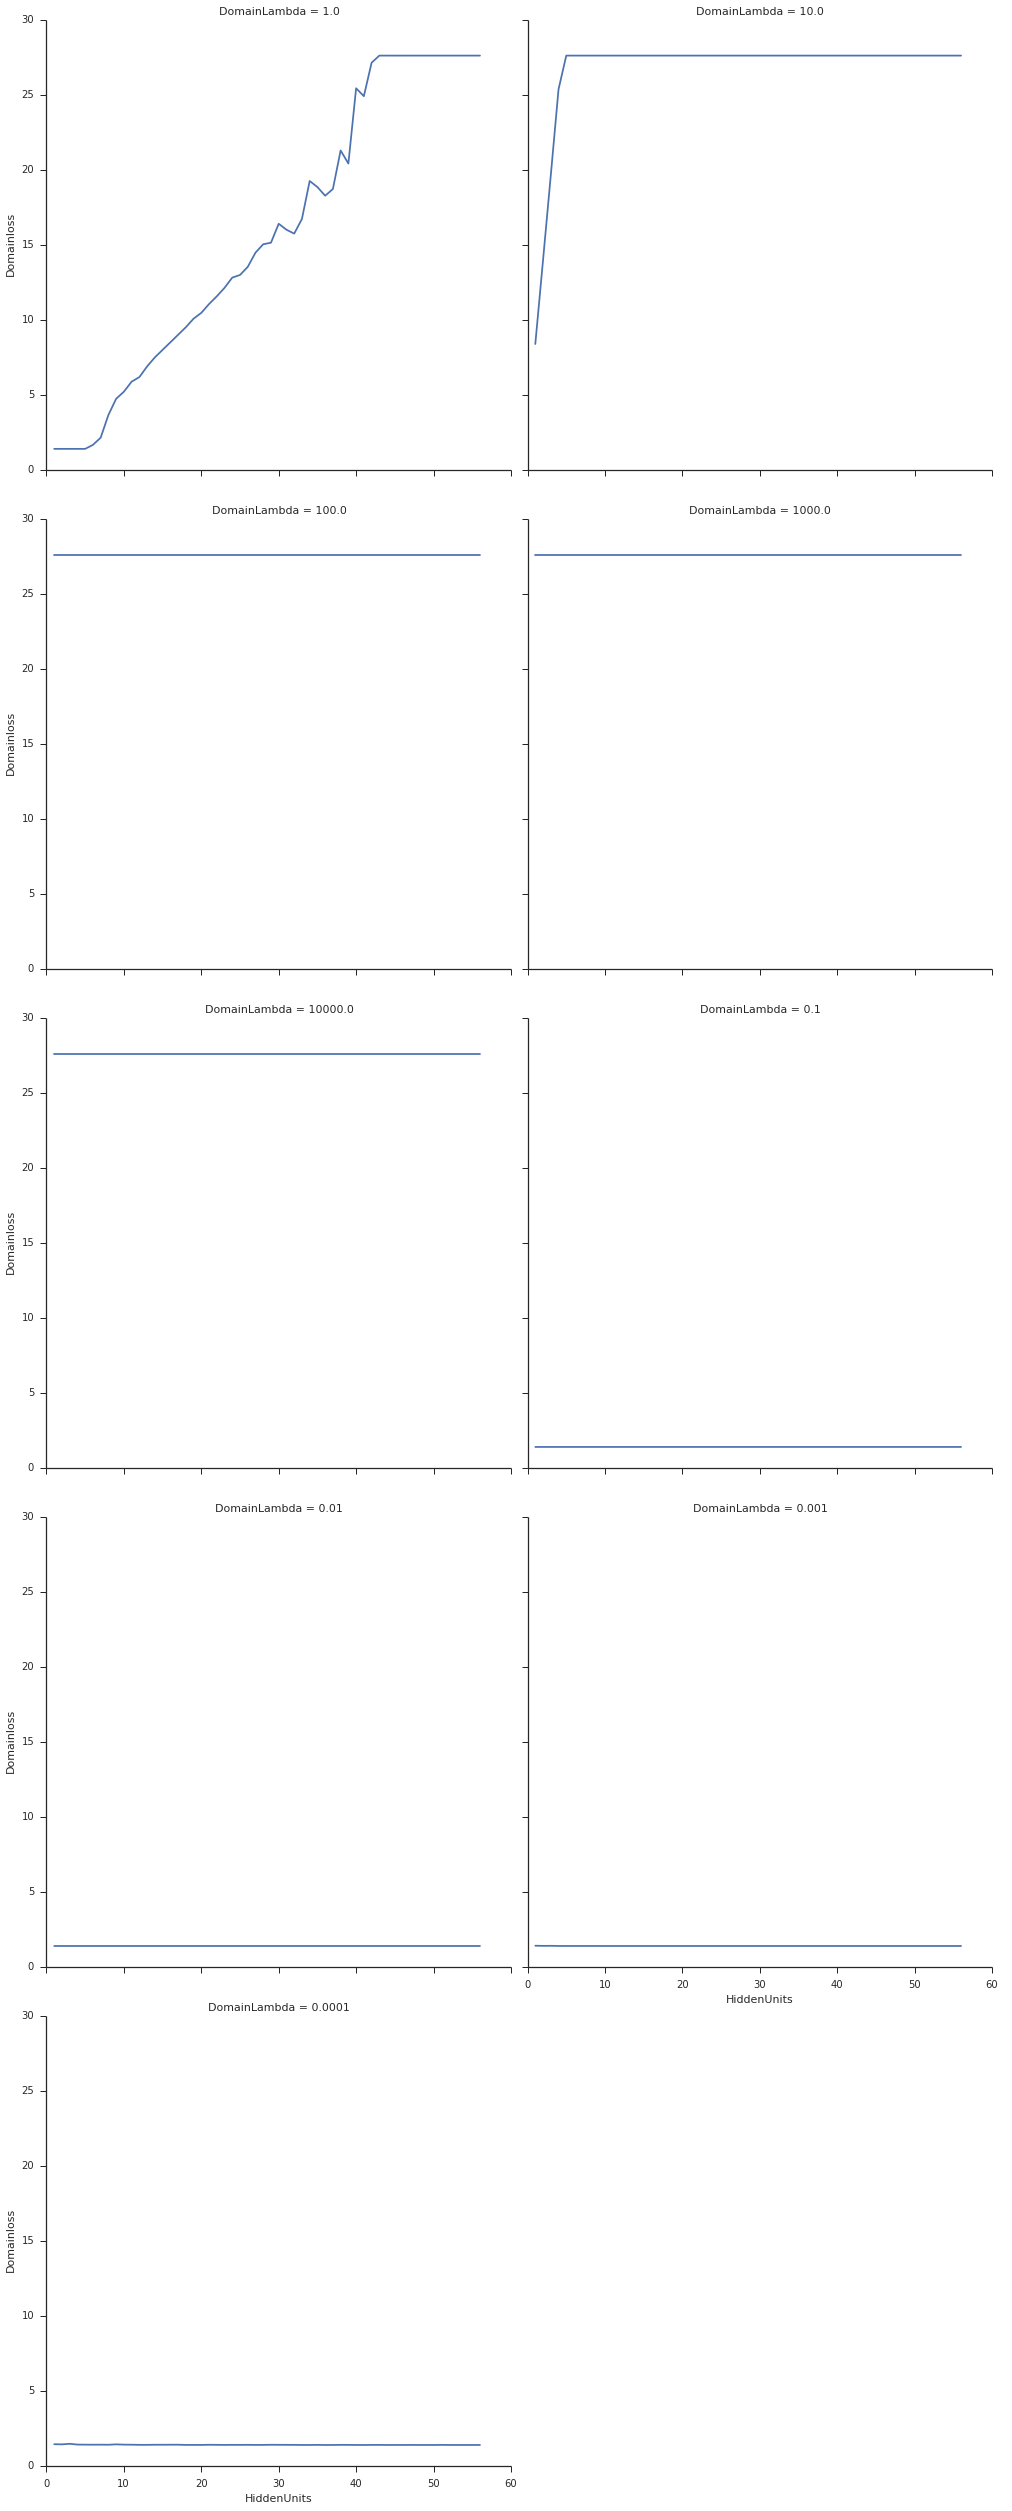

In [6]:
#g = sns.FacetGrid(average_value, hue="DomainLambda", size=13)
g = sns.FacetGrid(average_value, col_wrap = 2,col="DomainLambda", size=7)
g.map(plt.plot, "HiddenUnits", "Domainloss")
#g.map(plt.scatter, "HiddenUnits", "Domainloss", s=50, alpha=0.7, linewidth=.5, edgecolor="white")
g.add_legend();

# ReLU

For this exp, the initialition is identity. One hidden layer. Learning rate set to 1, 200 epoch

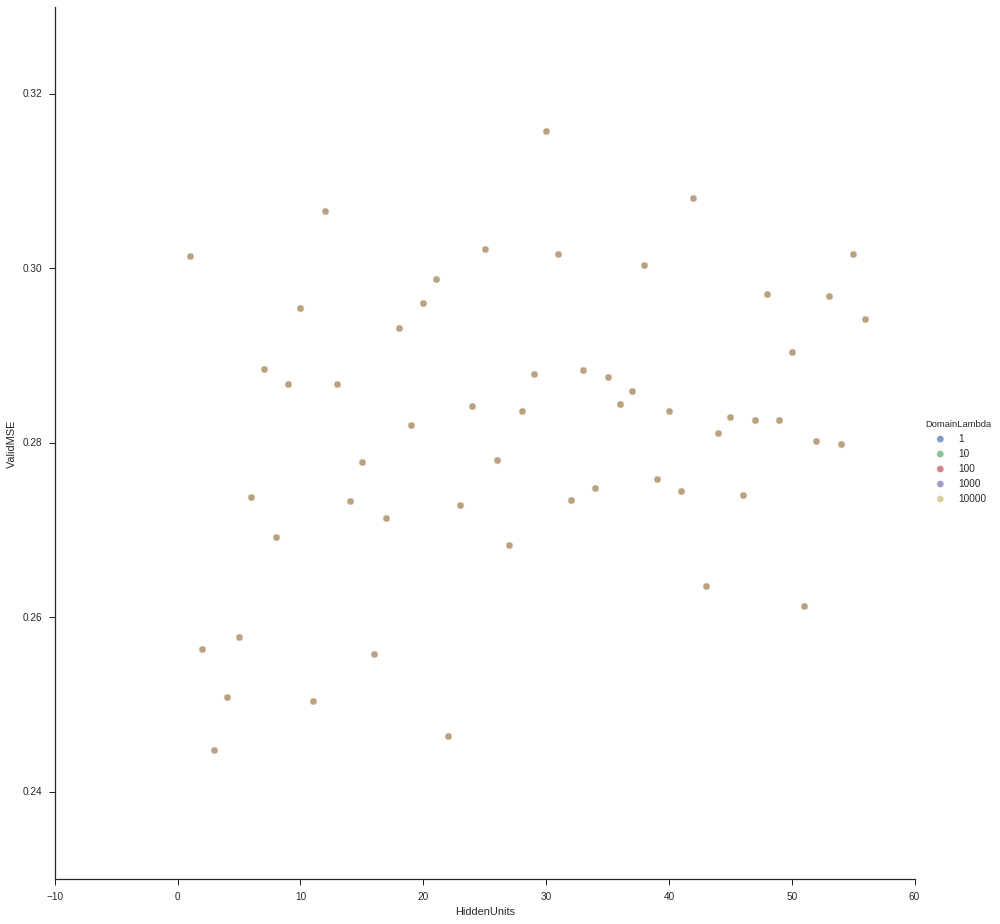

In [5]:
filepath = 'exp2/exp_ReLU.csv'
exp2_relu = pd.read_csv(filepath)
g = sns.FacetGrid(exp2_relu,hue="DomainLambda", size=13)
#g = sns.FacetGrid(exp2_relu,col_wrap=2, col="DomainLambda", size=6)
#g.map(plt.plot, "HiddenUnits", "ValidMSE")
g.map(plt.scatter, "HiddenUnits", "ValidMSE", s=50, alpha=0.7, linewidth=.5, edgecolor="white")
g.add_legend();

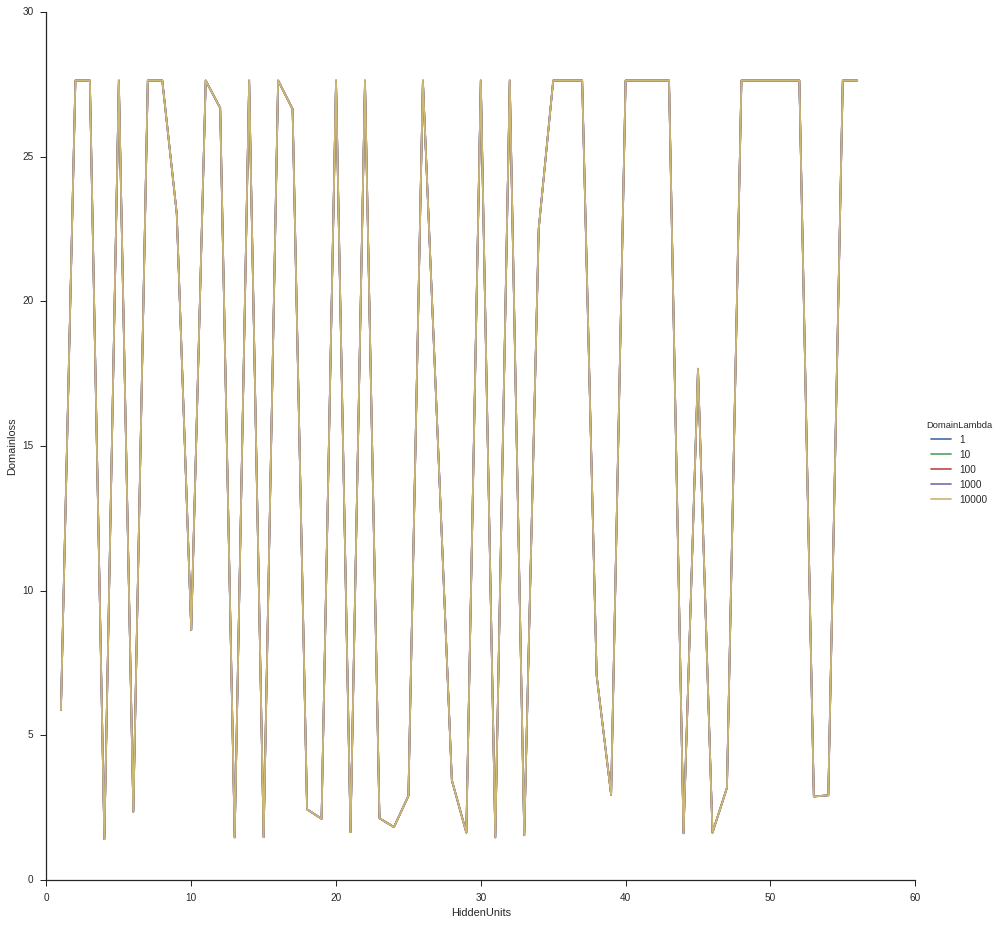

In [10]:
g = sns.FacetGrid(exp2_relu, hue="DomainLambda", size=13)
#g = sns.FacetGrid(exp2_relu, col_wrap = 2,col="DomainLambda", size=7)
g.map(plt.plot, "HiddenUnits", "Domainloss")
#g.map(plt.scatter, "HiddenUnits", "Domainloss", s=50, alpha=0.7, linewidth=.5, edgecolor="white")
g.add_legend();

# Different eta for adaptive schedule

In [8]:
# To see if we choose the 1.2 different
filepath = 'exp3/exp3.csv'
exp3 = pd.read_csv(filepath)
g = sns.FacetGrid(exp3, hue="etacoe", size=13)
g.map(plt.plot, "Epoch", "ValidMSE")
g.add_legend();

KeyError: 'etacoe'

# Pareno Front

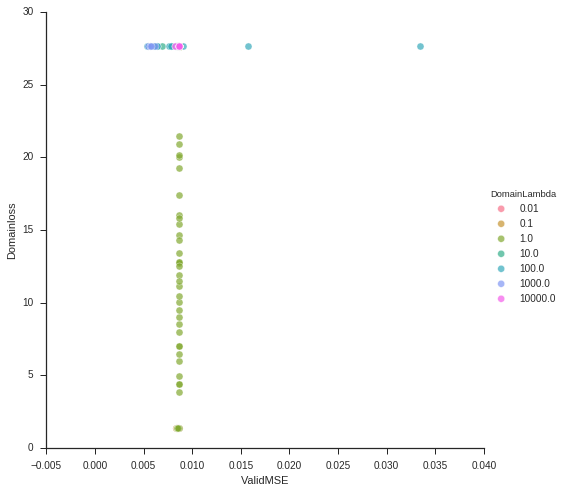

In [9]:
#pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(exp2, hue="DomainLambda", size=7)
g.map(plt.scatter, "ValidMSE", "Domainloss", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

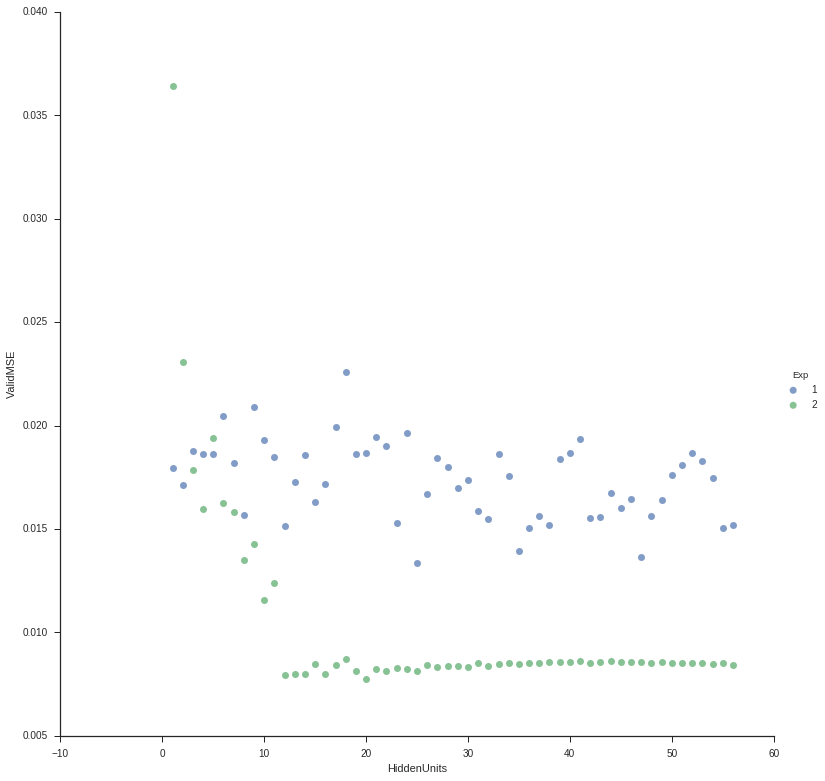

In [84]:
filepath = 'test.csv'
ml = pd.read_csv('test.csv')
g = sns.FacetGrid(ml, hue="Exp", size=11)
g.map(plt.scatter, "HiddenUnits", "ValidMSE", s=50, alpha=.7, linewidth=.1, edgecolor="white")
g.add_legend();